# Battle of the Neighborhoods II (Week 5 Submission)

### Applied Data Science Capstone by Coursera/IBM

## Table of Contents

+ [Introduction / Business Problem](#Introduction)
+ [Data Acquisition and Cleaning](#Data)
+ [Methodology](#Methodology)
+ [Analysis](#Analysis)
+ [Results and Discussions](#Results_and_Discussions)
+ [Conclusions](#Conclusions)

## Introduction / Business Problem <a name='Introduction'></a>

This project aims at the identifying the relationships between the different factors that could affect the spread of the *nouvelle coronavirus (COVID-19)* as well as the death toll in case of a widespread outbreak.

__Some of the factors to be considered include:__
* population, 
* literacy rate, 
* GDP (Gross Domestic Product – indicator of economic prowess) and 
* the current COVID-19 statistics. 

The analysis would be based carried out per state and the number of hospitals present in the central city of these states would be identified. 

The goal of the project is to recommending to the government, the states that would be in more dire need of their support. 

## Data Acquisition and Cleaning <a name='Data'></a>

### Data on Nouvelle CoronaVirus (COVID-19) in Nigeria


In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Data on COVID-19 Status in Nigeria
# This data is obtained from the National Data for Disease Control (NCDC), Nigeria
ncdc_address = 'https://covid19.ncdc.gov.ng/'
ncdc_scrapped = pd.read_html(ncdc_address)

# To chech for which DataFrame gives the table for the COVID-19 statistics per state.
for i,table in enumerate(ncdc_scrapped):
    print('Table indexed ', i, ':')
    print(table.head(3))
    print('End of DataFrame')
    print('')

Table indexed  0 :
              Date                                              Title
0  20th April 2020  National Strategy to Scale Up Access to Corona...
1  19th April 2020                  Self Isolation & Quarantine Guide
2  17th April 2020                                    Parenting Guide
End of DataFrame

Table indexed  1 :
                                 Unnamed: 0  \
0  Globally as at 10:00 CET 17th April 2020   
1                                       NaN   

                                          Unnamed: 1  
0  2 074 529 confirmed (82 967) new) 139 378 deat...  
1                                                NaN  
End of DataFrame

Table indexed  2 :
                       0       1
0   Total Samples Tested  > 7153
1  Total Confirmed cases     665
2             Discharged     188
End of DataFrame

Table indexed  3 :
  States Affected No. of Cases (Lab Confirmed)  No. of Active Cases  \
0           Lagos                         376‬                  266   
1       A

In [3]:
covid19_stat = ncdc_scrapped[3].sort_values('States Affected').reset_index(drop=True)
covid19_stat.columns = ['States', 'Confirmed Cases', 'Active Cases', 'Discharged Cases', 'Death Cases']
covid19_stat.replace('Abuja FCT', 'Abuja', inplace=True)
covid19_stat['Confirmed Cases'][15] = int(str(covid19_stat['Confirmed Cases'][15])[:3])
covid19_stat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,States,Confirmed Cases,Active Cases,Discharged Cases,Death Cases
0,Abia,2,2,0,0
1,Abuja,89,51,35,3
2,Akwa Ibom,9,5,3,1
3,Anambra,1,1,0,0
4,Bauchi,7,2,5,0
5,Benue,1,1,0,0
6,Borno,3,2,0,1
7,Delta,4,3,0,1
8,Edo,15,7,7,1
9,Ekiti,4,2,2,0


In [4]:
covid19_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
States              26 non-null object
Confirmed Cases     26 non-null object
Active Cases        26 non-null int64
Discharged Cases    26 non-null int64
Death Cases         26 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


### Population Statistics for Nigeria

In [5]:
# Importing the population statistics using pandas.read_excel() method.
# Data is sourced from National Bureau of Statistics, Nigeria.

pop_address = 'population.xlsx'
nbs_pop_scrapped = pd.read_excel(pop_address)
nbs_pop_scrapped.head()

,State,1991,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abuja,371674.0,1406239,1543293,1693706,1858777,2039937,2238752,2456945,2696403,2959199,3247608,3564126
1,Abia,2338487.0,2845380,2923252,3003255,3085447,3169889,3256642,3345769,3437336,3531408,3628055,3727347
2,Adamawa,2102053.0,3178950,3272489,3368781,3467906,3569948,3674992,3783127,3894444,4009037,4127001,4248436
3,Akwa Ibom,2409613.0,3902051,4037002,4176620,4321067,4470509,4625120,4785078,4950568,5121781,5298916,5482177
4,Anambra,2796475.0,4177828,4296460,4418461,4543926,4672954,4805646,4942106,5082440,5226760,5375177,5527809


In [6]:
population_stat = nbs_pop_scrapped[['State','2016']].sort_values('State').reset_index(drop=True)
population_stat.columns = ['States', 'Populations']
population_stat.head()

,States,Populations
0,Abia,3727347
1,Abuja,3564126
2,Adamawa,4248436
3,Akwa Ibom,5482177
4,Anambra,5527809


### Literacy Level Data

In [7]:
# This data gives the statistics of the literacy level in each state of the federation.
# This data is obtained from Wikipedia

literacy_address = 'https://en.wikipedia.org/wiki/List_of_Nigerian_states_by_literacy_rate'
literacy_rate_scrapped = pd.read_html(literacy_address)

# To chech for which DataFrame gives the table for the literacy rate per state.
for i,table in enumerate(literacy_rate_scrapped):
    print('Table indexed ', i, ':')
    print(table.head(3))
    print('End of DataFrame')
    print('')

Table indexed  0 :
  Rang          State  literacy rate(in %)
0    1    Lagos State                 92.0
1    2     Osun State                 80.0
2    3  Anambra State                 75.1
End of DataFrame

Table indexed  1 :
   vteLists of States of Nigeria  \
0                            NaN   

                     vteLists of States of Nigeria.1  \
0  Listed by: area population GDP HDI literacy ra...   

                     vteLists of States of Nigeria.2  \
0  Listed by: area population GDP HDI literacy ra...   

   vteLists of States of Nigeria.3  
0                              NaN  
End of DataFrame



In [8]:
import re

literacy_rate_scrapped[0].replace('Federal Capital Territory', 'Abuja', inplace=True)
literacy_stat = literacy_rate_scrapped[0].sort_values('State').reset_index(drop=True)
literacy_stat.drop('Rang', 1, inplace=True)
literacy_stat.columns = ['States', 'Literacy Rate']
literacy_stat.replace(' State$', '', regex = True, inplace=True)
literacy_stat.head()

,States,Literacy Rate
0,Abia,72.5
1,Abuja,61.4
2,Adamawa,40.5
3,Akwa Ibom,70.7
4,Anambra,75.1


### State Gross Domestic Product Data

In [9]:
# This data gives the GDP of each state in Nigeria.
# The data is obtanined from Wikipedia

gdp_address = 'https://en.wikipedia.org/wiki/List_of_Nigerian_states_by_GDP'
gdp_scrapped = pd.read_html(gdp_address)
gdp_stat = gdp_scrapped[1]
gdp_stat.drop('Rank', 1, inplace=True)
gdp_stat = gdp_stat.sort_values('State').reset_index(drop=True)
gdp_stat.columns = ['States', 'GDP']
gdp_stat.replace(' State$', '', regex = True, inplace=True)
gdp_stat.head()

,States,GDP
0,Abia,"US$8,687"
1,Adamawa,"US$4,582"
2,Akwa Ibom,"US$11,179"
3,Anambra,"US$6,764"
4,Bauchi,"US$4,713"


Cleaning the data above to remove the 'US$' before the values.

In [10]:
# Iterating through the list of GDP values and removing the 'US$' and ',' separator.
refined_GDP = []
for i in range(len(gdp_stat['GDP'])):
    val = ''.join(list(gdp_stat['GDP'].values)[i][3:].split(','))
    val = int(val)
    refined_GDP.append(val)
    
# Adding the value obtained to the table, droping the former column 'GDP' and renaming the columns.
gdp_stat['GDP Cleaned'] = pd.Series(refined_GDP, name = 'GDP Cleaned')
gdp_stat.drop('GDP', 1, inplace = True)
gdp_stat.columns = ['States', 'GDP']
gdp_stat.head()

,States,GDP
0,Abia,8687
1,Adamawa,4582
2,Akwa Ibom,11179
3,Anambra,6764
4,Bauchi,4713


### Obtaining Location Data using Geolocator

In [11]:
from geopy.geocoders import Nominatim

# Obtain the name of each state from any of the above table
state_name = list(population_stat['States'])

# Initializing the list of the longitudes and latitudes
latitude = []
longitude = []

# Obtaining the values using for loop.
print('Collecting Location data: ', end='')
for address in state_name:
    address = f'{address}, Nigeria'
    while True: 
        try:
            location = Nominatim(user_agent = 'foursquare_agent').geocode(address)
            print('.', end='')
            break
        except:
            print('?', end='')
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    
print('\nAll Data Collected!')

All Data Collected!


In [12]:
# Creating a DataFrame for the output results
location_stat = pd.DataFrame(state_name, columns=['States'])
location_stat['Latitude'] = pd.Series(latitude)
location_stat['Longitude'] = pd.Series(longitude)
location_stat.head()

,States,Latitude,Longitude
0,Abia,5.454095,7.515307
1,Abuja,9.064331,7.489297
2,Adamawa,9.512977,12.388189
3,Akwa Ibom,4.940864,7.841227
4,Anambra,6.218314,6.953184


### Obtaining the Hospital proportions across the states using FourSquare API

In [13]:
# Obtain credentials for FourSquare API

CLIENT_ID = 'JAMTHWMLQGSSK4APE5UVTZNFNWZKZOU3YOJYYBALEVQJZFNL'
CLIENT_SECRET = 'TVE4TOA2P1MSCEAR0121SI4PBPA5A3RW2NWQH00GIEKN3PTT' 
VERSION = '20200101'
LIMIT = 200

In [14]:
import requests
from pandas.io.json import json_normalize

query = 'hospital'

hospital_states = list(location_stat['States'])
hospital_count = []

print('Collecting data: ', end = '')
for name, lat, lng in zip(hospital_states, location_stat['Latitude'], location_stat['Longitude']):
    latitude = lat
    longitude = lng
    query = 'hospital'
    while True:
        try:
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, query, LIMIT)
            query_result = requests.get(url).json()
            count = len(query_result['response']['venues'])
            break
        except:
            print('?', end='')
            continue
    hospital_count.append(count)
    print('.', end = '')
print('All results obtained!')

In the above results, the dots _'...'_ signify the progress while the question marks _'???'_ signify errors encountered. The code was written so as to allow for completion of the query amidst error.

Let's check if the length of states equals the length of the hospital counts.

In [15]:
print(len(hospital_count) == len(hospital_states))
print(hospital_count)

True
[1, 50, 3, 9, 23, 3, 2, 3, 3, 0, 3, 0, 5, 1, 12, 0, 0, 2, 16, 33, 4, 0, 1, 5, 50, 32, 0, 50, 1, 5, 0, 0, 16, 2, 0, 0, 0]


The above results for the hospital counts doesn't reflect the exact numbers of hospitals in Nigeria states but rather, it should the relative proportions across different states.

In [16]:
hospital_stat = pd.DataFrame(hospital_states, columns=['States'])
hospital_stat['Hospital Proportions'] = pd.Series(hospital_count)
hospital_stat.head()

,States,Hospital Proportions
0,Abia,1
1,Abuja,50
2,Adamawa,3
3,Akwa Ibom,9
4,Anambra,23


### Merging the data into a single DataFrame and Data Preparation

In [34]:
# nigeria_stat = population_stat.join([covid19_stat, literacy_stat, gdp_stat, location_stat, hospital_stat], on='States', how='left')
nigeria_stat = population_stat.merge(covid19_stat, on='States', how='left')

# There are NaN's on the table due to states without COVID-19. The NaN's would be filled with '0'.
nigeria_stat.fillna(0, inplace=True)
nigeria_stat = nigeria_stat.merge(literacy_stat, on='States', how='left')

# Literacy rate of Nasarawa state is missing. Since, it is one of the states with poor eduction,
# we would assign the value of the 25% quartile
nigeria_stat['Literacy Rate'][25] = 33.8
nigeria_stat = nigeria_stat.merge(gdp_stat, on='States', how='left')

# The GDP of Abuja is missing. Since, it is one of the greatest economy in Nigeria, 
#we would assign the value of 75% quartile.
nigeria_stat['GDP'][1] = 10368

nigeria_stat = nigeria_stat.merge(hospital_stat, on='States', how='left')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [35]:
nigeria_stat

,States,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions
0,Abia,3727347,2,2.0,0.0,0.0,72.5,8687.0,1
1,Abuja,3564126,89,51.0,35.0,3.0,61.4,10368.0,50
2,Adamawa,4248436,0,0.0,0.0,0.0,40.5,4582.0,3
3,Akwa Ibom,5482177,9,5.0,3.0,1.0,70.7,11179.0,9
4,Anambra,5527809,1,1.0,0.0,0.0,75.1,6764.0,23
5,Bauchi,6537314,7,2.0,5.0,0.0,34.1,4713.0,3
6,Bayelsa,2277961,0,0.0,0.0,0.0,62.0,4337.0,2
7,Benue,5741815,1,1.0,0.0,0.0,45.1,6864.0,3
8,Borno,5860183,3,2.0,0.0,1.0,14.5,5175.0,3
9,Cross River,3866269,0,0.0,0.0,0.0,62.3,9292.0,0


## Methodology <a name='Methodology'></a>

Firstly, we would check the relationship between the following features:   
  * Confirmed Cases in relation to:
    * Population 
    * Income (GDP)
    * Death Cases
    * Literacy Rate
  * Hospital Proportions in relation to:
    * Population
    * GDP
    * Confirmed Cases   
  
Secondly, the features that would be used for further analysis would be identified. Then, we create a model to **predict the number of possible death cases in any states** based on the increase in the coronavirus infection. The model would be developed using **Linear Regression**, **Polynomial Regression** and **Non-Linear Regression**. And the best model for prediction would be identified.

Thirdly, the states would be clustered into three groups, expectedly, the most affected, averagely affected and least affected by the coronavirus. This would be done using **k-Means clustering**. Each of the clustered groups would be listed and compared with the COVID-19 statistics visually.


## Analysis <a name='Analysis'></a>

#### Exploratory Data Analysis

Let's have an overview of our datasets.

In [36]:
nigeria_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 9 columns):
States                  37 non-null object
Populations             37 non-null int64
Confirmed Cases         37 non-null object
Active Cases            37 non-null float64
Discharged Cases        37 non-null float64
Death Cases             37 non-null float64
Literacy Rate           37 non-null float64
GDP                     37 non-null float64
Hospital Proportions    37 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.9+ KB


The __'Confirmed Cases'__ feature is of the type __object__, let's convert it to numeric.

In [38]:
nigeria_stat['Confirmed Cases'] = pd.to_numeric(nigeria_stat['Confirmed Cases'], errors = 'coerce')
nigeria_stat['Confirmed Cases'][24] = 376
nigeria_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 9 columns):
States                  37 non-null object
Populations             37 non-null int64
Confirmed Cases         37 non-null float64
Active Cases            37 non-null float64
Discharged Cases        37 non-null float64
Death Cases             37 non-null float64
Literacy Rate           37 non-null float64
GDP                     37 non-null float64
Hospital Proportions    37 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Corrected! Now, let's check the distribution statistically.

In [39]:
nigeria_stat.describe()

,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,5.229744e+06,17.972973,12.297297,5.081081,0.594595,49.654054,8009.756757,9.054054
std,2.358088e+06,62.889889,44.607464,16.806709,2.178933,19.577376,6278.278163,14.905156
min,2.277961e+06,0.000000,0.000000,0.000000,0.000000,14.500000,2011.000000,0.000000
25%,3.727347e+06,0.000000,0.000000,0.000000,0.000000,33.800000,4123.000000,0.000000
50%,4.671695e+06,2.000000,2.000000,0.000000,0.000000,48.900000,6002.000000,3.000000
75%,5.741815e+06,9.000000,5.000000,2.000000,0.000000,65.700000,10368.000000,9.000000
max,1.307689e+07,376.000000,266.000000,97.000000,13.000000,92.000000,33679.000000,50.000000


Let's check for possible outliers.

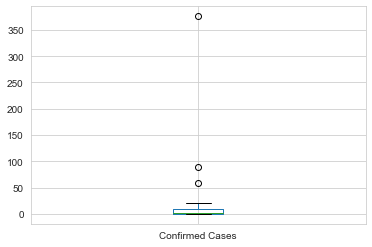

In [40]:
nigeria_stat['Confirmed Cases'].plot(kind='box')

Let's have a summarized visualization or rather overview of relationship between garnered data.

In [41]:
# Importing necessary packages

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

sb.set_style('whitegrid')
rcParams['figure.figsize'] = 6, 4

In [42]:
nigeria_stat_corr = nigeria_stat.corr()
nigeria_stat_corr

,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions
Populations,1.000000,0.584649,0.622852,0.463837,0.545732,0.140874,0.682694,0.413934
Confirmed Cases,0.584649,1.000000,0.995865,0.971015,0.985489,0.395032,0.722380,0.604758
Active Cases,0.622852,0.995865,1.000000,0.945376,0.979246,0.373247,0.721049,0.597534
Discharged Cases,0.463837,0.971015,0.945376,1.000000,0.958942,0.440674,0.695592,0.604091
Death Cases,0.545732,0.985489,0.979246,0.958942,1.000000,0.361476,0.723123,0.562624
Literacy Rate,0.140874,0.395032,0.373247,0.440674,0.361476,1.000000,0.575408,0.352976
GDP,0.682694,0.722380,0.721049,0.695592,0.723123,0.575408,1.000000,0.493334
Hospital Proportions,0.413934,0.604758,0.597534,0.604091,0.562624,0.352976,0.493334,1.000000


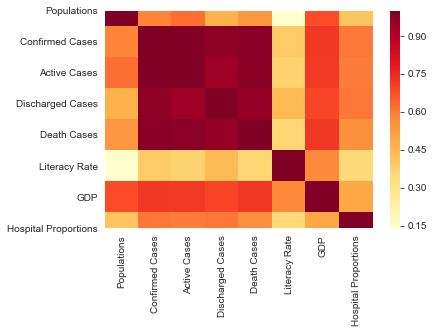

In [43]:
sb.heatmap(nigeria_stat_corr, cmap='YlOrRd')

The above heat map indicates a strong relation amongst the features relating to COVID-19. It also inferred that GDP has a strong relation while hospital proportion has a moderate relationship with the COVID-19 variables. The Literacy rate has a poor relationship with the COVID-19 variables.  
   
Hence, the following hypothesis need further check:  
1. The relationship between the death cases against population, GDP and literacy rate.
2. The  relationship between the hospital proportions and the COVID-19 data.

Let's scale the values obtained before visualization. Note, this scaling doesn't affect the relative proportion of the values. It only makes each parameters more comparable. 

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

working_stat = nigeria_stat.set_index('States')
working_stat

scaled_values = MinMaxScaler().fit(working_stat).transform(working_stat)
scaled_df = pd.DataFrame(scaled_values, columns = working_stat.columns)
scaled_df.head()

,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions
0,0.134216,0.005319,0.007519,0.000000,0.000000,0.748387,0.210812,0.02
1,0.119101,0.236702,0.191729,0.360825,0.230769,0.605161,0.263894,1.00
2,0.182469,0.000000,0.000000,0.000000,0.000000,0.335484,0.081186,0.06
3,0.296716,0.023936,0.018797,0.030928,0.076923,0.725161,0.289504,0.18
4,0.300942,0.002660,0.003759,0.000000,0.000000,0.781935,0.150088,0.46


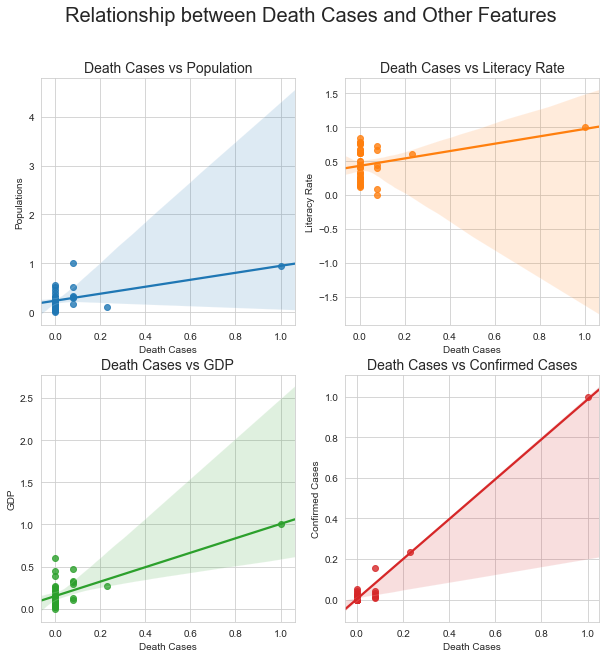

In [45]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

fig.suptitle('Relationship between Death Cases and Other Features', fontsize = 20)

sb.regplot(scaled_df['Death Cases'], scaled_df['Populations'], ax = axes[0, 0])
axes[0, 0].set_title('Death Cases vs Population', fontsize = 14)

sb.regplot(scaled_df['Death Cases'], scaled_df['Literacy Rate'], ax = axes[0, 1])
axes[0, 1].set_title('Death Cases vs Literacy Rate', fontsize = 14)

sb.regplot(scaled_df['Death Cases'], scaled_df['GDP'], ax = axes[1, 0])
axes[1, 0].set_title('Death Cases vs GDP', fontsize = 14)

sb.regplot(scaled_df['Death Cases'], scaled_df['Confirmed Cases'], ax = axes[1, 1])
axes[1, 1].set_title('Death Cases vs Confirmed Cases', fontsize = 14)

plt.savefig('COVID-19 vs Other Features (Regression Plots)')

The above plot signifies a __positive relationships__ between the death cases and all other features. But an __outlier is visible__ from the plots. As in all the cases, there is an extreme plot.  

Also from the plots, it is observed that majority of the __plots are skewed__. Hence, grouping the observation in clusters would signify the different clusters based on the cases.  

Since, all of the cases are correlated, the __death cases could be predicted__ using Regression.

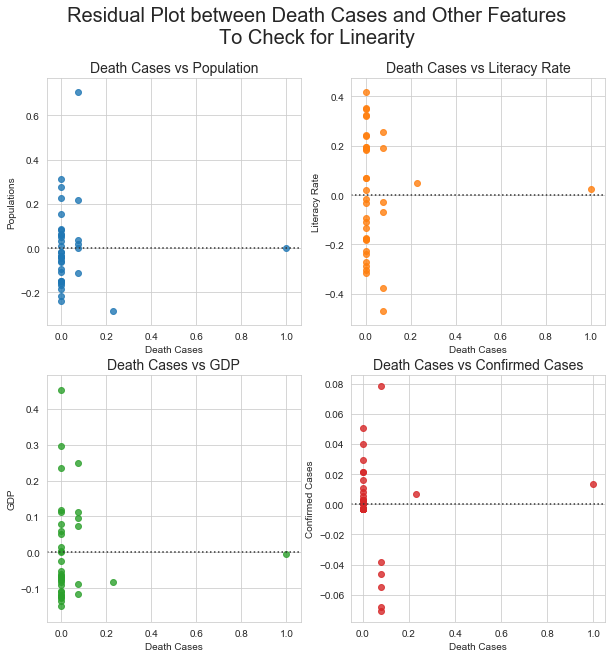

In [46]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

fig.suptitle('Residual Plot between Death Cases and Other Features\nTo Check for Linearity', fontsize = 20)

sb.residplot(scaled_df['Death Cases'], scaled_df['Populations'], ax = axes[0, 0])
axes[0, 0].set_title('Death Cases vs Population', fontsize = 14)

sb.residplot(scaled_df['Death Cases'], scaled_df['Literacy Rate'], ax = axes[0, 1])
axes[0, 1].set_title('Death Cases vs Literacy Rate', fontsize = 14)

sb.residplot(scaled_df['Death Cases'], scaled_df['GDP'], ax = axes[1, 0])
axes[1, 0].set_title('Death Cases vs GDP', fontsize = 14)

sb.residplot(scaled_df['Death Cases'], scaled_df['Confirmed Cases'], ax = axes[1, 1])
axes[1, 1].set_title('Death Cases vs Confirmed Cases', fontsize = 14)

plt.savefig('COVID-19 vs Other Features (Residual Plots)')

Hence, from the above descriptive statistical plots generated, it is the observed that the __residual plots of the regression lines are not all randomly distributed__ (e.g. the plot against GDP and the plot against COnfirmed Cases). Hence, a __polynomial regression__ would best fit the relation between the features and the confirmed cases. 

#### Deploying Machine Learning Algorithm For Prediction of Confirmed Cases

Let's check with Linear Regression

In [47]:
# Importing necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split

In [48]:
nigeria_stat.columns

Index(['States', 'Populations', 'Confirmed Cases', 'Active Cases',
       'Discharged Cases', 'Death Cases', 'Literacy Rate', 'GDP',
       'Hospital Proportions'],
      dtype='object')

In [49]:
y = scaled_df[['Death Cases']]
X = scaled_df[['Populations', 'Literacy Rate', 'GDP', 'Confirmed Cases']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=300)
# print(X_train)
# print(y_train)

In [98]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
print('The coefficients values are as follows: \nPopulation = ', LinReg.coef_[0][0], '\nLiteracy Rate = ', LinReg.coef_[0][1], '\nGDP = ', LinReg.coef_[0][2], '\nConfirmed Cases = ', LinReg.coef_[0][3])
print('\nThe Intercept is: ', LinReg.intercept_[0])

The coefficients values are as follows: 
Population =  -0.1141093284488752 
Literacy Rate =  -0.0404555492532992 
GDP =  0.13313675925742524 
Confirmed Cases =  0.9877696163500386

The Intercept is:  0.019887210689670122


The equation would be given thus:

y = 0.01989 + 0.98777a + 0.13314b - 0.11411c - 0.04046d
where y = Death Cases, a = Confirmed Cases, b = GDP, c = Population, d = Literacy Rate

Hence, from the linear regression, we observed that the coefficients of the regression is highest in Confirmed Cases, then, GDP, then, Population, and lastly Literacy Rate.   

**Evaluation:**

In [51]:
y_pred = LinReg.predict(X_test)

print('The regression variance score = ', r2_score(y_test, y_pred))

The regression variance score =  -0.22713372276704735


#### Re-Modelling using Polynomial Regression

In [52]:
k = 5

degree = list(range(1, k+1))

R_scores = []
MAE_vals = []
MSE_vals = []

for i in range(1, k + 1):
    poly = PolynomialFeatures(degree = i)
    px_train = poly.fit_transform(X_train)
    px_test = poly.fit_transform(X_test)
    
    LinReg = LinearRegression().fit(px_train, y_train)
    py_pred = LinReg.predict(px_test)
    
    var = float('{:.4f}'.format(LinReg.score(px_test, y_test)))
    MAE = float('{:.4f}'.format(mean_absolute_error(y_test, py_pred)))
    MSE = float('{:.4f}'.format(mean_squared_error(y_test, py_pred)))
    
    R_scores.append(var)
    MAE_vals.append(MAE)
    MSE_vals.append(MSE)

Let's visualize our result to select the best prediction model.

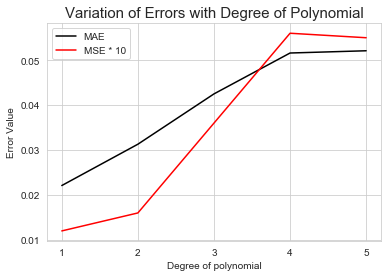

In [53]:
plt.plot(degree, MAE_vals, 'k-')
plt.plot(degree, np.array(MSE_vals) * 10, 'r-')
plt.xlabel('Degree of polynomial')
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('Error Value')
plt.legend(['MAE', 'MSE * 10'])
plt.title('Variation of Errors with Degree of Polynomial', fontsize=15)
plt.savefig('Variation of Errors with Degree of Polynomial')

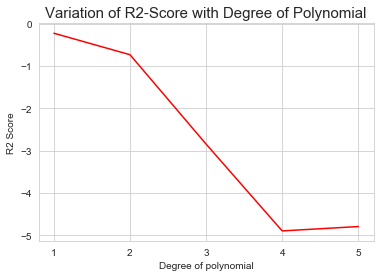

In [54]:
plt.plot(degree, R_scores, 'r-')
plt.xlabel('Degree of polynomial')
plt.ylabel('R2 Score')
plt.xticks([1, 2, 3, 4, 5])
plt.title('Variation of R2-Score with Degree of Polynomial', fontsize=15)
plt.savefig('Variation of R2-Score with Degree of Polynomial')

From the above visualizations, the best degree of polynomial to be deployed is __n = 1__.  
Hence, we define our testing model thus:

In [66]:
poly = PolynomialFeatures(degree = 1)
px_train = poly.fit_transform(X_train)
px_test = poly.fit_transform(X_test)
LinReg = LinearRegression().fit(px_train, y_train)

In [85]:
def DeathPredict(state, confirmed_cases = 0):
    state = state.lower()
    if state.endswith(' state'):
        state = state.split(' ')[0].capitalize()
    else:
        state = state.capitalize()
        
    idx = list(working_stat.index).index(state)
    y = np.array(list(scaled_df.iloc[idx][4:5]))
    y = y * (max(working_stat['Death Cases']) - min(working_stat['Death Cases'])) + min(working_stat['Death Cases']) 
    confirmed_case_scaled = (confirmed_cases - min(working_stat['Confirmed Cases']))/(max(working_stat['Confirmed Cases']) - min(working_stat['Confirmed Cases']))
    x = np.array(list(scaled_df.iloc[idx])[0:1] + list(scaled_df.iloc[idx])[-2:] + [confirmed_case_scaled])
    poly = PolynomialFeatures(degree = 1)
    px = poly.fit_transform(x.reshape(1, -1))
    y_pred = LinReg.predict(px)
    y_pred = y_pred * (max(working_stat['Death Cases']) - min(working_stat['Death Cases'])) + min(working_stat['Death Cases']) 
    
    print('The current death toll in ', state, ' is ', int(y))
    print('The predicted death toll when cases rise to ', confirmed_cases, ' would be ', int(y_pred))
    
def get_death_predict(state, confirmed_cases = 0):
    state = state.lower()
    if state.endswith(' state'):
        state = state.split(' ')[0].capitalize()
    else:
        state = state.capitalize()
        
    idx = list(working_stat.index).index(state)
    y = np.array(list(scaled_df.iloc[idx][4:5]))
    y = y * (max(working_stat['Death Cases']) - min(working_stat['Death Cases'])) + min(working_stat['Death Cases']) 
    confirmed_case_scaled = (confirmed_cases - min(working_stat['Confirmed Cases']))/(max(working_stat['Confirmed Cases']) - min(working_stat['Confirmed Cases']))
    x = np.array(list(scaled_df.iloc[idx])[0:1] + list(scaled_df.iloc[idx])[-2:] + [confirmed_case_scaled])
    poly = PolynomialFeatures(degree = 1)
    px = poly.fit_transform(x.reshape(1, -1))
    y_pred = LinReg.predict(px)
    y_pred = y_pred * (max(working_stat['Death Cases']) - min(working_stat['Death Cases'])) + min(working_stat['Death Cases']) 
    y_pred = int(y_pred)
    return y_pred

In [86]:
DeathPredict('Kwara', 40)

The current death toll in  Kwara  is  0
The predicted death toll when cases rise to  40  would be  1


The curved of the predicted case for " State"

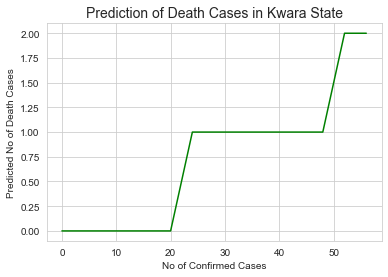

In [97]:
state = 'Kwara'
x = [x for x in range(0, 60, 4)]
y = [get_death_predict(state, i) for i in x]

plt.plot(x, y, 'g-')
plt.title(f'Prediction of Death Cases in {state} State', fontsize = 14)
plt.xlabel('No of Confirmed Cases')
plt.ylabel('Predicted No of Death Cases')
plt.savefig('Predicted Death Cases')

#### Grouping States Into Clusters

In [58]:
from sklearn.cluster import KMeans

In [59]:
k = 4

k_means = KMeans(init = 'k-means++', n_clusters = k, n_init = 20)
k_means.fit(scaled_df.drop(['Active Cases', 'Discharged Cases'], axis =1))

working_stat['Cluster Label'] = np.array(k_means.labels_)
working_stat.head()

,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions,Cluster Label
States,,,,,,,,,
Abia,3727347,2.0,2.0,0.0,0.0,72.5,8687.0,1,0
Abuja,3564126,89.0,51.0,35.0,3.0,61.4,10368.0,50,3
Adamawa,4248436,0.0,0.0,0.0,0.0,40.5,4582.0,3,2
Akwa Ibom,5482177,9.0,5.0,3.0,1.0,70.7,11179.0,9,0
Anambra,5527809,1.0,1.0,0.0,0.0,75.1,6764.0,23,0


In [60]:
import folium

In [75]:
nig_lat, nig_lng = 9.0820, 8.6753
map_nigeria = folium.Map(location = [nig_lat, nig_lng], zoom_start=6)

for lat, lng, clust, state in zip(location_stat['Latitude'], location_stat['Longitude'], working_stat['Cluster Label'], location_stat['States']):
    if clust == 2:
        cluster = 'Minimal Case'
        colors = 'yellow'
    elif clust == 0:
        cluster = 'Developing Case'
        colors = 'blue'
    elif clust == 3:
        cluster = 'Serious Case'
        colors = 'red'
    else:
        cluster = 'Extreme'
        colors = 'black'
    
    folium.CircleMarker(
        location = [lat, lng],
        popup = f'{state.upper()}\n{cluster}',
        color = colors,
        radius=4
    ).add_to(map_nigeria)

map_nigeria.save('map.html')
map_nigeria

Now, the clusters have been identified, let's list the groups in each clusters.

In [76]:
print('==============================================================')
print('States with Minimal Cases')
print('==============================================================\n')

working_stat.loc[working_stat['Cluster Label'] == 2, working_stat.columns[:]]

States with Minimal Cases



,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions,Cluster Label
States,,,,,,,,,
Adamawa,4248436,0.0,0.0,0.0,0.0,40.5,4582.0,3,2
Bauchi,6537314,7.0,2.0,5.0,0.0,34.1,4713.0,3,2
Benue,5741815,1.0,1.0,0.0,0.0,45.1,6864.0,3,2
Borno,5860183,3.0,2.0,0.0,1.0,14.5,5175.0,3,2
Ebonyi,2880383,0.0,0.0,0.0,0.0,53.0,2732.0,0,2
Edo,4235595,15.0,7.0,7.0,1.0,45.8,11888.0,5,2
Gombe,3256962,5.0,5.0,0.0,0.0,39.3,2501.0,0,2
Jigawa,5828163,2.0,2.0,0.0,0.0,24.2,2988.0,2,2
Kaduna,8252366,9.0,5.0,4.0,0.0,29.3,10334.0,16,2


In [77]:
print('==============================================================')
print('States with Developing Cases')
print('==============================================================\n')

working_stat.loc[working_stat['Cluster Label'] == 0, working_stat.columns[:]]

States with Developing Cases



,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions,Cluster Label
States,,,,,,,,,
Abia,3727347,2.0,2.0,0.0,0.0,72.5,8687.0,1,0
Akwa Ibom,5482177,9.0,5.0,3.0,1.0,70.7,11179.0,9,0
Anambra,5527809,1.0,1.0,0.0,0.0,75.1,6764.0,23,0
Bayelsa,2277961,0.0,0.0,0.0,0.0,62.0,4337.0,2,0
Cross River,3866269,0.0,0.0,0.0,0.0,62.3,9292.0,0,0
Delta,5663362,4.0,3.0,0.0,1.0,65.7,16749.0,3,0
Ekiti,3270798,4.0,2.0,2.0,0.0,74.7,2848.0,1,0
Enugu,4411119,2.0,0.0,2.0,0.0,66.5,4396.0,12,0
Imo,5408756,0.0,0.0,0.0,0.0,53.2,14212.0,0,0


In [78]:
print('==============================================================')
print('States with Serious Cases')
print('==============================================================\n')

working_stat.loc[working_stat['Cluster Label'] == 3, working_stat.columns[:]]

States with Serious Cases



,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions,Cluster Label
States,,,,,,,,,
Abuja,3564126,89.0,51.0,35.0,3.0,61.4,10368.0,50,3
Kano,13076892,59.0,58.0,0.0,1.0,48.9,12393.0,33,3
Nassarawa,2523395,0.0,0.0,0.0,0.0,33.8,3022.0,32,3
Ogun,5217716,12.0,7.0,5.0,0.0,62.8,10470.0,50,3


In [79]:
print('==============================================================')
print('States with Extreme Cases')
print('==============================================================\n')

working_stat.loc[working_stat['Cluster Label'] == 1, working_stat.columns[:]]

States with Extreme Cases



,Populations,Confirmed Cases,Active Cases,Discharged Cases,Death Cases,Literacy Rate,GDP,Hospital Proportions,Cluster Label
States,,,,,,,,,
Lagos,12550598,376.0,266.0,97.0,13.0,92.0,33679.0,50,1


## Results and Discussions <a name='Results_and_Discussions'></a>

 ### Analysing the Linear Regression. 

#### Relative Strength of Each Variable on the Amount of Death Cases Recorded

The Linear Regression gave the following value as the co-efficient of the variable in the regression. The co-efficient give the relative strenth of each variable with respect to the target variable 'Death Cases'.   

The coefficients values are as follows:   
+ Population =  -0.1141   
+ Literacy Rate =  -0.0404    
+ GDP =  0.1331  
+ Confirmed Cases =  0.9878  

Hence, from the above, the __Death Case is strongly correlated with the number of COVID-19 confirmed cases__. The other features have very low relationship with the death cases recorded. Though, the __state commercial status also show a very weak positive relation__ to the number of cases recorded. 

#### Model Development to Predict Number of Death Cases

The Linear Regression has a score, r2_score = 0.2271. 

This implies that the __relationship__ between Death Cases and other features outline namely Confirmed Cases, State Income Level (GDP), Literacy Level and Population __is not linear__. Also, the __residual plot__ of each variable against Death Cases gave __an order scattered plot as an output__ which signifies that Linear Regression Model couldn't be deployed. 

Hence, __polynomial regression need be used__ to obtain the model desired.

### Results on k-Means Clustering

The goal of the analysis is to group the data based on the features selected into four clusters. And we make prediction based on the results obtained.

+ The first cluster are those that have __zero or very low cases of coronavirus__ recorded. These are states that are sparsely or sparingly infected. It's also observed that majority of them have __very low hospital proportions__ and relatively __low value of GDP__.   
   
+ The second cluster consists of state with __low cases of coronavirus__ which range __between 1 to 4 cases__ with exception of Osun, Oyo and Akwa-Ibom which could be termed as mis-classified states. The are states that are __mildly or mininally infected__ and the __spread of the virus is just developing__. The states in this group are not correlated on GDP (a number of them has high values and a number also has small values) but __majority of them have low hospital proportions__.   
   
+ The third cluster (with exception of Nasarawa state which is mis-classified) consists of states with __high amount of coronavirus cases__ as compared to the earlier discussed clusters. They also have relatively __high proportion of hospitals__. It also observed that these states have a __high rate of commerce (GDP)__ compared to states in the previously discussed clusters. Hence, the states in this cluster are __seriously infected and the virus is spreading__.   
   
+ The fourth cluster is the case of an outlier. It is a point which has a __very high amount of cases confirmed__. It is observed that this state has a __very high hospital proportions__ and also the __best state for commerce__ (having the highest GDP). Hence, this state could be said to be __extremely affected__ and the virus could be __spreading exponentially__. 

#### Cluster Map Interpretation

The following could be observed from the map:  

+ From the Folium Map generated, it is observed that majority of the __states in the Northern region are having minimal cases__ (yellow markers) while the __states in the Southern region are having developing cases__ (blue markers). Hence, spread could be due to inter-state movements.  
+ States with __serious cases__ (red marker) are __not distributed based on location__ on the map. __But these are regions with high commerce__ and hence, spread could be due to the that.  
+ The last case has been adequately categorized as an outlier with severe condition.

## Conclusions <a name='Conclusions'></a>

The following conclusions and consequent recommendation could be made:

| Cluster | Conclusion | Recommendation |
| :--- | :--- | :--- |
| 1 | Northern States are sparingly affected. They have poor infractures to combat the virus if infected. | Measures should be taken against travelling to these states. |  
| 2 | Southern States are increasingly infected. | Restrictions on movement should be made to curtail the spread. |
| 3 | Commercial States are seriously infected. | Governmental intervention needed to provide facilities to treat infected persons. And restrictions on movement and commerce need be made to minimize spread. |
| 4 | Lagos State is relatively extremely infected. It is the home to the best commerce and also has good hospital proportion. | State of emergency need be declared and there should be total movement lockdown. The health facilities need be improved and more medical equipments and materials need be deployed. |   

__Hence, Lagos State and other states in the third cluster are in dire need of governmental support.__